In [13]:
import pandas as pd
import numpy as np
from datetime import datetime
import holidays
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('flights')

In [9]:
df.isnull().sum()

Unnamed: 0                    0
Unnamed: 0.1                  0
fl_date                       0
op_unique_carrier             0
tail_num                  39483
op_carrier_fl_num             0
origin_airport_id             0
dest_airport_id               0
crs_dep_time                  0
dep_delay                210562
crs_arr_time                  0
arr_delay                     0
cancelled                     0
cancellation_code      12527071
crs_elapsed_time             18
distance                      0
carrier_delay          10335164
weather_delay          10335164
nas_delay              10335164
security_delay         10335164
late_aircraft_delay    10335164
dtype: int64

In [10]:
sum(df['arr_delay'] >= 0)

4867629

In [11]:
y0 = df.loc[df['arr_delay'] <= 0, 'arr_delay']

(-80.0, 0.0)

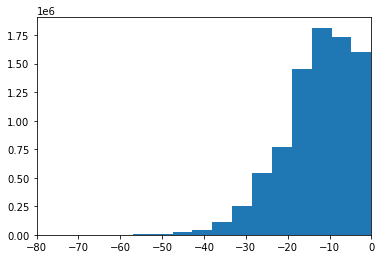

In [16]:
plt.hist(y0, bins=100)
plt.xlim(-80,0)

In [17]:
y1 = df.loc[df['arr_delay'] > 0, 'arr_delay']

(40.0, 300.0)

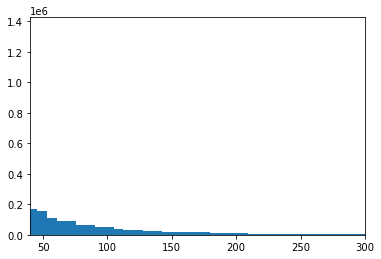

In [26]:
plt.hist(y1, bins=400)
plt.xlim(40,300)

In [8]:
df['arr_delay'].fillna(0,inplace=True)

In [73]:
df_train = df[['fl_date','op_unique_carrier','tail_num','op_carrier_fl_num','origin_airport_id','dest_airport_id','crs_dep_time','crs_arr_time','crs_elapsed_time','distance']]

In [92]:
y = df['arr_delay']

In [140]:
X_train, X_test = train_test_split(df, test_size=0.2) 

In [145]:
df_train = X_train[['fl_date','op_unique_carrier','op_carrier_fl_num','arr_delay']]

In [178]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12591836 entries, 11774876 to 5066841
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   fl_date    object 
 1   arr_delay  float64
 2   uni_fl     float64
dtypes: float64(2), object(1)
memory usage: 384.3+ MB


In [187]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12591836 entries, 11774876 to 5066841
Data columns (total 4 columns):
 #   Column       Dtype  
---  ------       -----  
 0   uni_fl       float64
 1   month        object 
 2   day_of_week  int64  
 3   is_holiday   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 480.3+ MB


In [184]:
df_train.groupby('is_holiday')['arr_delay'].mean()

is_holiday
0    1.740948
1    1.362521
Name: arr_delay, dtype: float64

In [177]:
unifl_target_mean.to_csv('unifl_target_mean')

In [ ]:
#choose set of features
df_train = X_train[['fl_date','op_unique_carrier','op_carrier_fl_num','arr_delay']]

# after test data, arr_delay should be 0. 
df_train['arr_delay'].fillna(0,inplace=True)

#remove outliner
df_train = df_train[(df_train['arr_delay'] > -80) & (df_train['arr_delay'] < 180)] 

#combine features
def combine_str_num(x,y):
    return x + str(y)
df_train['uni_fl'] = np.vectorize(combine_str_num)(df_train['op_unique_carrier'],df_train['op_carrier_fl_num'])
df_train.drop(columns=['op_unique_carrier','op_carrier_fl_num'],inplace=True)

# feature coding
unifl_target_mean = df_train.groupby(['uni_fl'])['arr_delay'].mean()
df_train['uni_fl'] = df_train['uni_fl'].map(unifl_target_mean)

In [189]:
#transform fl_date
def getmonth(x):
    return x.split(sep='-')[1]
df_train['month'] = df_train['fl_date'].apply(getmonth)

def getdayofweek(x):
    year_s, mon_s, day_s = x.split('-')
    fl_d = datetime(int(year_s), int(mon_s), int(day_s))
    return fl_d.weekday()
df_train['day_of_week'] = df_train['fl_date'].apply(getdayofweek)

us_holidays = holidays.UnitedStates()
def isholiday(x):
    year_s, mon_s, day_s = x.split('-')
    if datetime(int(year_s), int(mon_s), int(day_s)) in us_holidays:
        return 1
    else:
        return 0
df_train['is_holiday'] = df_train['fl_date'].apply(isholiday)

y_train = df_train['arr_delay']

df_train = df_train.drop(columns=['fl_date','arr_delay'])

df_train = pd.get_dummies(df_train,columns=['month','day_of_week'])

In [208]:
scaler = StandardScaler()

In [209]:
X = scaler.fit_transform(df_train)

In [ ]:
X.shape

In [190]:
y_train = df_train['arr_delay']

In [207]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12591836 entries, 11774876 to 5066841
Data columns (total 21 columns):
 #   Column         Dtype  
---  ------         -----  
 0   uni_fl         float64
 1   is_holiday     int64  
 2   month_01       uint8  
 3   month_02       uint8  
 4   month_03       uint8  
 5   month_04       uint8  
 6   month_05       uint8  
 7   month_06       uint8  
 8   month_07       uint8  
 9   month_08       uint8  
 10  month_09       uint8  
 11  month_10       uint8  
 12  month_11       uint8  
 13  month_12       uint8  
 14  day_of_week_0  uint8  
 15  day_of_week_1  uint8  
 16  day_of_week_2  uint8  
 17  day_of_week_3  uint8  
 18  day_of_week_4  uint8  
 19  day_of_week_5  uint8  
 20  day_of_week_6  uint8  
dtypes: float64(1), int64(1), uint8(19)
memory usage: 516.4 MB


In [197]:
df_train.head()

,uni_fl,is_holiday,month_01,month_02,month_03,month_04,month_05,month_06,month_07,month_08,...,month_10,month_11,month_12,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
11774876,4.592269,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
8648414,13.292593,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
11648639,5.556188,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
724728,-5.047619,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3151471,2.464879,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [210]:
parametersGrid = {    "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10],
                      "l1_ratio": [0,0.2,0,5,0.8]}

In [211]:
ent = ElasticNet()

In [ ]:
grid = GridSearchCV(ent, parametersGrid, scoring='r2', cv=5)
grid.fit(x_small, y_small)
#Y_pred = grid.predict(X_test)